In [1]:
# Import TensorFlow. TensorFlow provides the deep learning framework and Keras API for building models.
import tensorflow as tf


from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


Download and prepare the MNIST Dataset directly from TensorFlow's built-in datasets

In [2]:
# Load the MNIST dataset directly from TensorFlow's built-in datasets.
# The dataset is automatically downloaded from an online source and split into training and test sets.
# x_train and x_test contain image pixel data, while y_train and y_test contain the corresponding digit labels.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
# Normalize the pixel values of the images from the original range of 0 to 255 to a range of 0 to 1.
# This scaling helps the neural network train faster and more reliably.
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# The number of training and testing data after splittiing
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))

Number of training samples: 60000
Number of test samples: 10000


Let's plot the first 25 images from the training set 

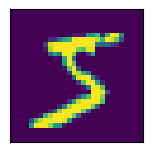

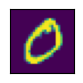

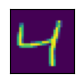

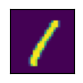

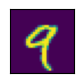

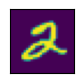

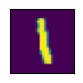

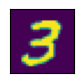

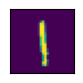

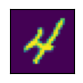

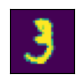

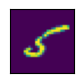

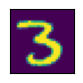

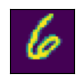

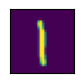

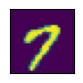

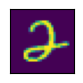

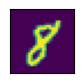

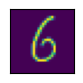

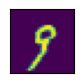

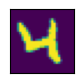

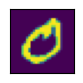

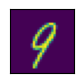

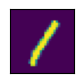

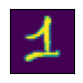

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The MNIST labels happen to be arrays, 
    # which is why you need the extra index
  
    plt.show()

In [6]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10) # The numner of digits is 10 (0-9)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Build the model

In [7]:
input_shape = (28,28,1)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),    #The Flatten layer converts the 2D 28x28 images into a 1D array of 784 pixels
        tf.keras.layers.Dropout(0.3), # Dropout layer randomly sets 20% of its inputs to zero during training.
                                # This prevents overfitting by ensuring that the model does not rely too heavily on any particular set of features.
        tf.keras.layers.Dense(10, activation="softmax"),# The final Dense layer with 10 neurons and softmax activation.
                                                            # Each neuron corresponds to one of the 10 digits (0-9), and softmax outputs a probability distribution.
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [8]:

# - optimizer='adam': Adam optimizer adjusts the learning rate during training.
# - loss='sparse_categorical_crossentropy': This loss function is used for integer-labeled classification.
# - metrics=['accuracy']: The model will report accuracy during training and testing.
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# Train (fit) the model on the training data over 10 epochs.
# An epoch means one full pass through the entire training dataset.
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.7873 - loss: 0.7066 - val_accuracy: 0.9793 - val_loss: 0.0784
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9702 - loss: 0.0992 - val_accuracy: 0.9853 - val_loss: 0.0538
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9777 - loss: 0.0727 - val_accuracy: 0.9858 - val_loss: 0.0510
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9814 - loss: 0.0593 - val_accuracy: 0.9893 - val_loss: 0.0415
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9831 - loss: 0.0529 - val_accuracy: 0.9902 - val_loss: 0.0369
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9865 - loss: 0.0429 - val_accuracy: 0.9912 - val_loss: 0.0339
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9892 - loss: 0.0354 - val_accuracy: 0.9908 - val_loss: 0.0331
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9886 - loss: 0.0359 - 

Accuracy achieved: 99.29%
Loss: 0.0212

Evaluate the trained model on the test set.This provides an unbiased evaluation of how well the model generalizes to new, unseen data.

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02587766759097576
Test accuracy: 0.9908999800682068
